<center><font size = "10"> Week 8 - Synapses<center>
<center><font size = "8">Tutorial 02: Tsodyks-Markram model<center>

<font size='3'><font color='blue'> In this tutorial you will use an AMPA and NMDA model of glutamate receptors augmented with a model of synapse dynamics, the Tsodyks-Markram model. You will learn how to implement the mathamatical formulations into the MOD file and you will get a deeper understanding of this widely used formulation of synapse dynamics.

### Compile the MOD file

In [1]:
!nrnivmodl

/home/in_silico/InSilicoClass/my_notebooks/week8
SimpleAMPA_NMDA.mod TsodyksMarkram_AMPA_NMDA.mod vecevent.mod
SimpleAMPA_NMDA.mod TsodyksMarkram_AMPA_NMDA.mod vecevent.mod
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=compile gcc -DHAVE_CONFIG_H  -I. -I.. -I"/usr/local/nrn/include/nrn" -I"/usr/local/nrn/x86_64/lib"      -g -O2 -c -o mod_func.lo mod_func.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -I.. -I/usr/local/nrn/include/nrn -I/usr/local/nrn/x86_64/lib -g -O2 -c mod_func.c  -fPIC -DPIC -o .libs/mod_func.o
"/usr/local/nrn/share/nrn/libtool" --tag=CC --mode=link gcc -module  -g -O2    -o libnrnmech.la -rpath "/usr/local/nrn/x86_64/lib"  SimpleAMPA_NMDA.lo TsodyksMarkram_AMPA_NMDA.lo vecevent.lo mod_func.lo  -L"/usr/local/nrn/x86_64/lib" -lnrnoc -loc -lmemacs  -lscopmath -lsparse13 -lreadline -lncurses -ltinfo -L"/usr/local/nrn/x86_64/lib" -lnrniv -livoc -lneuron_gnu -lmeschach -lsundials       -lm -ldl
libtool: link: rm -fr  .libs/libnrnmech.la .libs/libnrnmech.lai .libs/libn

### Load the modules and hoc files that will be used

In [2]:
import neuron
from neuron import h
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

# Load external files & initialize
neuron.h.load_file("stdrun.hoc");
neuron.h.stdinit();

### A neuron to host your synapse

<font size='3'>Following the previous tutorial, we will create a single compartment soma neuron to host the synapse.

In [3]:
soma = neuron.h.Section()
soma.L = 40
soma.diam = 40
soma.insert('pas')

__nrnsec_0x3a6f760

In [4]:
# Configure the passive biophysics
for sec in h.allsec():
    sec.Ra = 100
    sec.cm = 1

<font size='3'>Create the synapse at the center of the soma compartment

In [5]:
synapse = h.TsodyksMarkram_AMPA_NMDA(soma(0.5))

### Define the stimulus:

<font size='3'> 8 spikes at 20Hz + 1 spike 500 ms later

In [6]:
stimulator = h.VecStim()
spike_times = [100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400.0, 450.0, 950.0]
spikes_vector = h.Vector(spike_times)
stimulator.play(spikes_vector)

connection = h.NetCon(stimulator, synapse)
connection.weight[0] = 1.0        # In units of [nS] due to the gmax scaling factor in our .mod file

### Create a recorder for the synaptic conductance, current, the soma voltage, and the time intervals

In [8]:
g_syn = h.Vector()
g_syn.record(synapse._ref_g)
i_syn = h.Vector()
i_syn.record(synapse._ref_i)
v_soma = h.Vector()
v_soma.record(soma(0.5)._ref_v)
time = h.Vector()
time.record(neuron.h._ref_t)
R_syn = h.Vector()
R_syn.record(synapse._ref_R)
Use_syn = h.Vector()
Use_syn.record(synapse._ref_Use)

Vector[12]

### AMPA and NMDA conductances

<font size='3'>Let's configure biologically plausible values for the AMPA and NMDA model parameters

In [9]:
synapse.gmax_AMPA = 0.002 # uS
synapse.gmax_NMDA = 0.7 * 0.002 # uS - 0.7 is a biologically typical ratio of NMDA to AMPA conductance
synapse.mg = 1.0 # mM

### Pseudolinear synapse: E3

<font size='3'>Now let's configure parameters for pseudo linear synapse dynamics (E3), and simulate

In [10]:
synapse.U1 = 0.2 # Baseline release probability
synapse.tau_rec = 200 # ms - recovery from depression
synapse.tau_facil = 200 # ms - relaxation from facilitation

h.tstop = 1000.0 # ms
neuron.h.run()

0.0

(0.0, 1000.0, -70.0, -69.5)

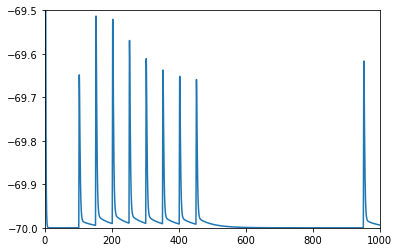

In [11]:
plt.figure()
plt.plot(time, v_soma)
plt.axis([0, 1000, -70, -69.5])

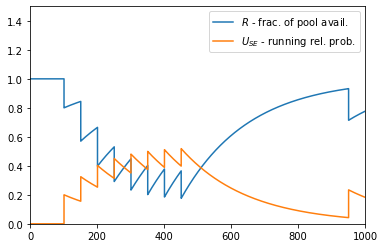

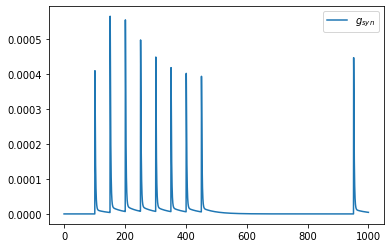

In [12]:
plt.figure()
plt.plot(time, R_syn, label='$R$ - frac. of pool avail.')
plt.plot(time, Use_syn, label='$U_{SE}$ - running rel. prob.')
plt.legend()
plt.axis([0,1000,0,1.5])

plt.figure()
plt.plot(time, g_syn, label="$g_{syn}$")
plt.legend()

### Depressing synapse: E2

<font size='3'>Now, let's configure a depressing synapse (E2).  Such synapses have a higher baseline release probability, a longer recovery time from depression, and a very short relaxation time of facilitation. 

In [13]:
synapse.U1 = 0.5 # Baseline release probability
synapse.tau_rec = 700 # ms - recovery from depression
synapse.tau_facil = 10 # ms - relaxation from facilitation

h.run()

0.0

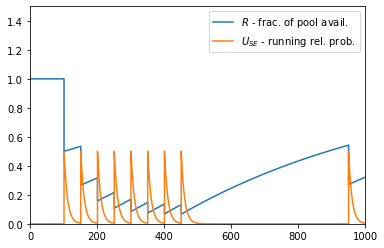

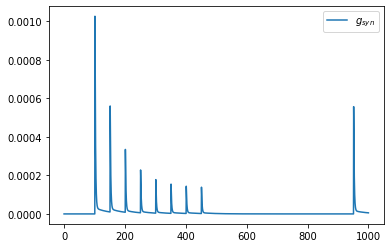

In [14]:
plt.figure()
plt.plot(time, R_syn, label='$R$ - frac. of pool avail.')
plt.plot(time, Use_syn, label='$U_{SE}$ - running rel. prob.')
plt.legend()
plt.axis([0,1000,0,1.5])

plt.figure()
plt.plot(time, g_syn, label="$g_{syn}$")
plt.legend()